## Apriori Algorithm for Association Rule Mining for threat intelligence

The Association Rule Mining Algorithm, Apriori is chosen for its ability to efficiently discover frequent itemsets and association rules within a dataset. In cyber threat intelligence , this means identifying patterns of events or attributes that often occur together [1]. The algorithm ensures that only relevant associations meeting predefined thresholds of Support and Confidence are considered, which is crucial when dealing with large volumes of threat intel data. Thus Apriori Algorithm is tested on open source threat intel data gathered using IntelMQ.
* **Support**
    
    In the context of cyber threat intelligence, support denotes the percentage of security events in which two or more variables coexist. Greater support values signify more robust correlations among the variables[1].
* **Confidence**

    Confidence is used  to describe the probability that if one event happens, another event or would also occur. In cyber threat intelligence, Confidence for instance would assist in assessing the likelihood that a specific kind of attack or piece of malware is involved in an intrusion attempt that is discovered[1].

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install apyori

  Preparing metadata (setup.py) ... done
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5955 sha256=8d62ca8469899889ac8e34da1eac41f85d6fb5d4b4e5b0d7fbc758bcde0673ae
  Stored in directory: /root/.cache/pip/wheels/c4/1a/79/20f55c470a50bb3702a8cb7c94d8ada15573538c7f4baebe2d
Successfully built apyori


In [ ]:
from apyori import apriori

# 1. Import data



In [ ]:
import json
import pandas as pd
import numpy as np

threat_data_raw = '/content/drive/MyDrive/Uni2024/Analytics4Privacy/dataset29.txt'

# handle json parsing issues, neglect the lines with error and proceed.
threat_data = []

with open(threat_data_raw, 'r') as file:
    for line in file:
        try:
            threat_data.append(json.loads(line))
        except json.JSONDecodeError:
            pass

# Convert to a DataFrame and display the datafrmae
threat_df = pd.DataFrame(threat_data)
threat_df

,classification.taxonomy,classification.type,event_description.text,feed.accuracy,feed.name,feed.provider,feed.url,protocol.application,source.abuse_contact,source.allocated,...,extra.blocklist,source.fqdn,source.port,source.url,source.urlpath,status,protocol.transport,extra.last_online,malware.name,source.reverse_dns
0,intrusion-attempts,brute-force,Address has been seen attempting to remotely l...,100.0,HTTP,Dataplane,https://dataplane.org/sshpwauth.txt,ssh,abuse@digitalocean.com,2018-07-12T00:00:00+00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,intrusion-attempts,brute-force,Address has been seen attempting to remotely l...,100.0,HTTP,Dataplane,https://dataplane.org/sshpwauth.txt,ssh,abuse@digitalocean.com,2018-07-12T00:00:00+00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,intrusion-attempts,brute-force,Address has been seen attempting to remotely l...,100.0,HTTP,Dataplane,https://dataplane.org/sshpwauth.txt,ssh,abuse@digitalocean.com,2020-01-17T00:00:00+00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,intrusion-attempts,brute-force,Address has been seen attempting to remotely l...,100.0,HTTP,Dataplane,https://dataplane.org/sshpwauth.txt,ssh,abuse@digitalocean.com,2020-01-17T00:00:00+00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,intrusion-attempts,brute-force,Address has been seen attempting to remotely l...,100.0,HTTP,Dataplane,https://dataplane.org/sshpwauth.txt,ssh,abuse@digitalocean.com,2020-01-17T00:00:00+00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289976,malicious-code,c2-server,NaN,100.0,Feodo Tracker,Abuse.ch,https://feodotracker.abuse.ch/downloads/ipbloc...,NaN,NaN,2009-07-21T00:00:00+00:00,...,NaN,NaN,60859.0,NaN,NaN,online,NaN,2023-11-20,pikabot,NaN
289977,malicious-code,c2-server,NaN,100.0,Feodo Tracker,Abuse.ch,https://feodotracker.abuse.ch/downloads/ipbloc...,NaN,NaN,2013-03-15T00:00:00+00:00,...,NaN,NaN,13721.0,NaN,NaN,online,NaN,2023-11-20,pikabot,172-233-156-100.ip.linodeusercontent.com
289978,malicious-code,c2-server,NaN,100.0,Feodo Tracker,Abuse.ch,https://feodotracker.abuse.ch/downloads/ipbloc...,NaN,NaN,2013-03-15T00:00:00+00:00,...,NaN,NaN,13721.0,NaN,NaN,online,NaN,2023-11-20,pikabot,172-233-156-100.ip.linodeusercontent.com
289979,malicious-code,c2-server,NaN,100.0,Feodo Tracker,Abuse.ch,https://feodotracker.abuse.ch/downloads/ipbloc...,NaN,NaN,2011-02-02T00:00:00+00:00,...,NaN,NaN,1194.0,NaN,NaN,offline,NaN,2023-11-19,pikabot,NaN


# 2. Feature Engineering

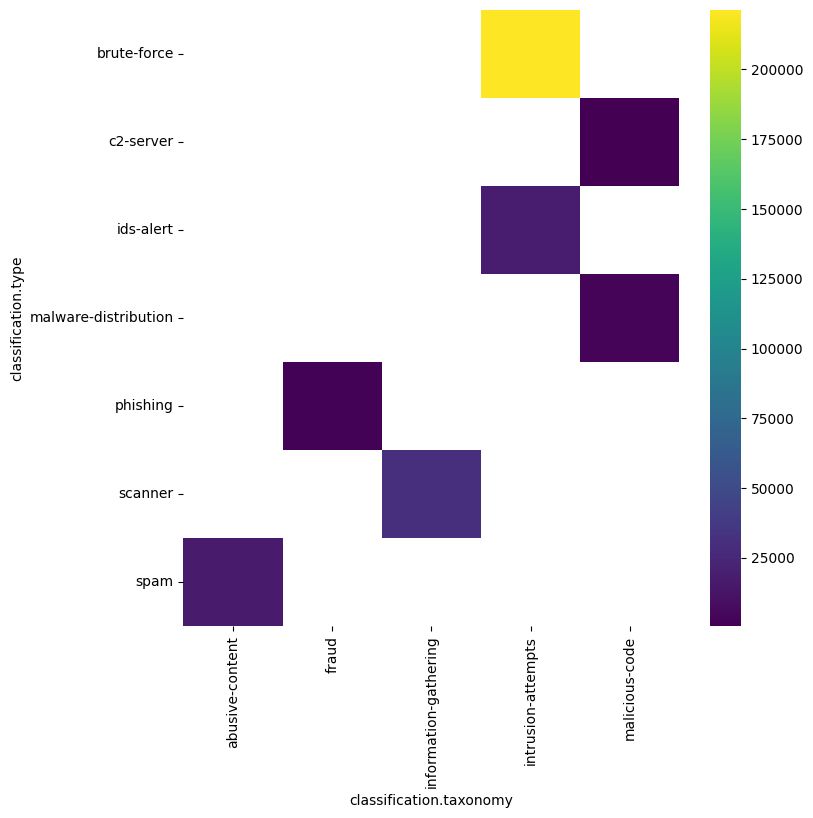

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['classification.type'].value_counts()
    for x_label, grp in threat_df.groupby('classification.taxonomy')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('classification.taxonomy')
_ = plt.ylabel('classification.type')

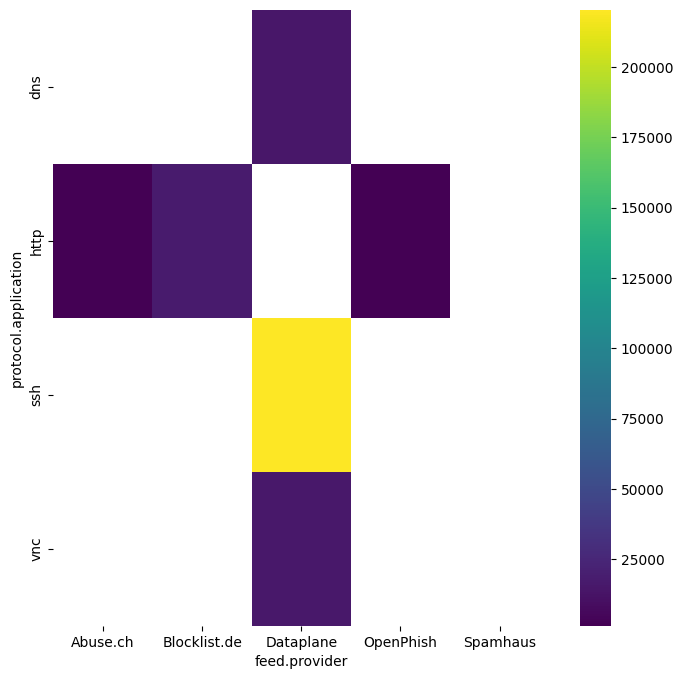

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['protocol.application'].value_counts()
    for x_label, grp in threat_df.groupby('feed.provider')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('feed.provider')
_ = plt.ylabel('protocol.application')

In [ ]:
# Columns to include in the new DataFrame
columns_to_include = ['classification.taxonomy', 'classification.type','feed.name','source.network','protocol.application','source.ip',"malware.name"]
# Creating the new DataFrame with selected columns
df_ml = threat_df[columns_to_include]

df_ml

,classification.taxonomy,classification.type,feed.name,source.network,protocol.application,source.ip,malware.name
0,intrusion-attempts,brute-force,HTTP,142.93.192.0/20,ssh,142.93.202.26,NaN
1,intrusion-attempts,brute-force,HTTP,142.93.192.0/20,ssh,142.93.206.129,NaN
2,intrusion-attempts,brute-force,HTTP,143.110.176.0/20,ssh,143.110.176.216,NaN
3,intrusion-attempts,brute-force,HTTP,143.110.176.0/20,ssh,143.110.188.217,NaN
4,intrusion-attempts,brute-force,HTTP,143.110.176.0/20,ssh,143.110.189.97,NaN
...,...,...,...,...,...,...,...
289976,malicious-code,c2-server,Feodo Tracker,91.215.85.0/24,NaN,91.215.85.154,pikabot
289977,malicious-code,c2-server,Feodo Tracker,172.233.128.0/19,NaN,172.233.156.100,pikabot
289978,malicious-code,c2-server,Feodo Tracker,172.233.128.0/19,NaN,172.233.156.100,pikabot
289979,malicious-code,c2-server,Feodo Tracker,46.250.240.0/21,NaN,46.250.241.188,pikabot


# 3. Preprocess


The data is preprocessed by placing it in a List of Lists. The code below creates a list of string values for each row in the dataset by iteratively going through each row. Then, by appending these lists, a larger list representing transactions is created that can be examined using the Apriori algorithm.


In [ ]:
transactions = []
for i in range(0, 20000):
    transactions.append([str(df_ml.values[i,j]) for j in range(0, 7)])
print(transactions)

[['intrusion-attempts', 'brute-force', 'HTTP', '142.93.192.0/20', 'ssh', '142.93.202.26', 'nan'], ['intrusion-attempts', 'brute-force', 'HTTP', '142.93.192.0/20', 'ssh', '142.93.206.129', 'nan'], ['intrusion-attempts', 'brute-force', 'HTTP', '143.110.176.0/20', 'ssh', '143.110.176.216', 'nan'], ['intrusion-attempts', 'brute-force', 'HTTP', '143.110.176.0/20', 'ssh', '143.110.188.217', 'nan'], ['intrusion-attempts', 'brute-force', 'HTTP', '143.110.176.0/20', 'ssh', '143.110.189.97', 'nan'], ['intrusion-attempts', 'brute-force', 'HTTP', '143.110.224.0/20', 'ssh', '143.110.227.81', 'nan'], ['intrusion-attempts', 'brute-force', 'HTTP', '143.110.224.0/20', 'ssh', '143.110.229.68', 'nan'], ['intrusion-attempts', 'brute-force', 'HTTP', '143.110.224.0/20', 'ssh', '143.110.233.255', 'nan'], ['intrusion-attempts', 'brute-force', 'HTTP', '143.110.224.0/20', 'ssh', '143.110.233.79', 'nan'], ['intrusion-attempts', 'brute-force', 'HTTP', '143.110.240.0/20', 'ssh', '143.110.241.56', 'nan'], ['intrusi

# 4. Train

In [ ]:
from apyori import apriori

#Generate rules
rules = apriori(transactions, min_support = 0.05, min_confidence = 0.5, min_lift = 3, max_length = 4)

#Convert rules to list
results = list(rules)

#Convertt result to list of list for readibility
finalResults = [list(x) for x in results]
print(finalResults)

[[frozenset({'45.78.0.0/20', 'information-gathering'}), 0.05945, [OrderedStatistic(items_base=frozenset({'45.78.0.0/20'}), items_add=frozenset({'information-gathering'}), confidence=1.0, lift=4.588208304657031)]], [frozenset({'45.78.0.0/20', 'scanner'}), 0.05945, [OrderedStatistic(items_base=frozenset({'45.78.0.0/20'}), items_add=frozenset({'scanner'}), confidence=1.0, lift=4.588208304657031)]], [frozenset({'45.78.0.0/20', 'vnc'}), 0.05945, [OrderedStatistic(items_base=frozenset({'45.78.0.0/20'}), items_add=frozenset({'vnc'}), confidence=1.0, lift=6.1218243036424855)]], [frozenset({'information-gathering', 'dns'}), 0.0546, [OrderedStatistic(items_base=frozenset({'dns'}), items_add=frozenset({'information-gathering'}), confidence=1.0, lift=4.588208304657031)]], [frozenset({'dns', 'scanner'}), 0.0546, [OrderedStatistic(items_base=frozenset({'dns'}), items_add=frozenset({'scanner'}), confidence=1.0, lift=4.588208304657031)]], [frozenset({'information-gathering', 'scanner'}), 0.21795, [Ord

# 5. Print the Association rules for analysis:
* The code below iterates through each association rule to print its index, the rule itself, and the items involved, to facilitate manual inspection and validation of the rules, enabling refinement of the analysis if needed.

In [ ]:
for i in range(len(results)):
    print("##############################################################################")
    print(i)
    print(results[i])
    print(results[i].items)

##############################################################################
0
RelationRecord(items=frozenset({'45.78.0.0/20', 'information-gathering'}), support=0.05945, ordered_statistics=[OrderedStatistic(items_base=frozenset({'45.78.0.0/20'}), items_add=frozenset({'information-gathering'}), confidence=1.0, lift=4.588208304657031)])
frozenset({'45.78.0.0/20', 'information-gathering'})
##############################################################################
1
RelationRecord(items=frozenset({'45.78.0.0/20', 'scanner'}), support=0.05945, ordered_statistics=[OrderedStatistic(items_base=frozenset({'45.78.0.0/20'}), items_add=frozenset({'scanner'}), confidence=1.0, lift=4.588208304657031)])
frozenset({'45.78.0.0/20', 'scanner'})
##############################################################################
2
RelationRecord(items=frozenset({'45.78.0.0/20', 'vnc'}), support=0.05945, ordered_statistics=[OrderedStatistic(items_base=frozenset({'45.78.0.0/20'}), items_add=frozenset({'vn

# Conclusion
Apriori Algorithm can be integrated to Deakin Threaat Mirror to discover connections between various IoCs (IP addresses, protocols, malware names,...) that might point to malicious activity, such reconnaissance, scanning, or exploitation attempts, by examining common itemsets and association rules.

# Limitations
Even though the Apriori algorithm offers insightful information about possible relation between different IoCs, it's important to be aware of its limitations. The support, confidence, and lift thresholds that the algorithm uses are predetermined and not been tested throughly due to limitted time. These thresholds may need to be changed with through testing and optimisation for real time systems. Also, Association rules should be used together with other other measure like machine learning models as they may not be sufficient to fully depict the threat landscape on their own.


# Reference
 [1] M. S. Abu, S. R. Selamat, R. Yusof, and A. Ariffin, "An attribution of cyberattack using association rule mining (ARM)," International Journal of Advanced Computer Science and Applications, vol. 11, no. 2, 2020.